# Assignment 6

In this assignment, we'll finally work with some nonconjugate models. I will also introduce you to reparameterization techniques.

## Instructions

Please complete this Jupyter notebook and **don't** convert it to a `.py` file. Upload this notebook, along with any `.stan` files and any data sets as a `zip` file to Gradescope. 

Your work will be manually graded by our TA. There is no autograder for this assignment. For free response work, feel free to add a markdown cell and type in there. Try to keep the preexisting structure as much as possible, and to be organized and label which cells correspond with which questions.

This jupyter notebook should look somewhat like a report. It should be easy to follow for someone who understands how to write the code and interpret your results!





### Problem 1: Stocks (revisited with `stan`)

Previously we took unconstrained multivariate data, and we used a multivariate normal distribution for it. That is, suppose each length $k$ row is called $y_i$ and that each row is independent. Then

$$
L(y_1, \ldots, y_N \mid \theta) = \prod_{j=1}^N L(y_j \mid \theta)
$$

where $\theta = (\mu, \Sigma)$ and 

$$
 y_k \mid \mu, \Sigma \sim \text{Normal}(\mu, \Sigma).
$$

We used the **Normal Inverse Wishart** prior because it's the conjugate prior. That involves choosing $\mu_0, \kappa_0, \Lambda_0, \nu_0$ Now I'll introduce a different prior that is very popular for `stan` users that is simpler to choose and sometimes produces a posterior that is easier to sample from.



In [1]:
import pandas as pd
import numpy as np
import os
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

1.

Download the data `stocks.csv` and assign it to a `pandas` `DataFrame` called `adj_prices`. Be sure to set the date as the index.

Calculate percent returns (scaled by $100$) and call the resulting `DataFrame` `rets`. After understanding where they come from, be sure to remove any `NaN`s.

In [2]:
adj_prices = pd.read_csv("stocks.csv", index_col='Date')
adj_prices.head()

,SPY,QQQ
Date,,
2020-01-02,304.113556,210.605392
2020-01-03,301.810730,208.676270
2020-01-06,302.962158,210.020767
2020-01-07,302.110260,209.991577
2020-01-08,303.720428,211.569916


In [3]:
rets = adj_prices.pct_change().dropna()*100
rets.head()

,SPY,QQQ
Date,,
2020-01-03,-0.757226,-0.915989
2020-01-06,0.381507,0.644298
2020-01-07,-0.281190,-0.013899
2020-01-08,0.532974,0.751620
2020-01-09,0.678064,0.847351


2.

Use the same prior as you did for homework 4 and simulate from the prior predictive distribution. Instead of doing it with your own handwritten function `sim_data()`, use `stan` to accomplish this. Produce appropriate visualizations and comment on them. 

NB: If I might suggest a small tweak to the demo code--don't hardcode any prior hyperparams. This will make it easier to change your prior later on!

In [4]:
model_code2 = os.path.join('.', 'hw62.stan')
model2 = CmdStanModel(stan_file=model_code2)

01:28:15 - cmdstanpy - INFO - compiling stan file /bml24/hw62.stan to exe file /bml24/hw62
01:28:38 - cmdstanpy - INFO - compiled model executable: /bml24/hw62


In [5]:
wish_data = {'K': 2,
    'N': 1000,
    'nu0': 10,
    'Lambda0': np.array([[1/2,0],[0,1/3]]),
    'mu0': np.array([0,0]),
    'kappa0': 1}
fit2 = model2.sample(wish_data, fixed_param = True)

01:28:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:28:40 - cmdstanpy - INFO - CmdStan done processing.


In [6]:
fit2.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,"Sigma[1,1]","Sigma[2,1]","Sigma[1,2]","Sigma[2,2]",mu[1],...,"y_sim[991,2]","y_sim[992,2]","y_sim[993,2]","y_sim[994,2]","y_sim[995,2]","y_sim[996,2]","y_sim[997,2]","y_sim[998,2]","y_sim[999,2]","y_sim[1000,2]"
0,1.0,1.0,1.0,0.0,0.0,0.046364,0.020595,0.020595,0.070857,0.263810,...,0.278204,-0.203835,0.302421,0.211318,0.501154,0.206671,0.295757,0.438505,0.401828,0.440601
1,1.0,2.0,2.0,0.0,0.0,0.057285,0.014369,0.014369,0.076699,0.363084,...,0.079331,0.123278,0.208501,-0.160304,0.557745,0.839187,0.435143,0.056666,0.662216,0.434206
2,1.0,3.0,3.0,0.0,0.0,0.072287,0.001279,0.001279,0.018006,-0.108331,...,0.107273,0.137083,-0.111613,-0.071411,-0.184319,-0.091759,-0.041027,-0.212623,-0.021688,0.039228
3,1.0,4.0,4.0,0.0,0.0,0.077802,0.030950,0.030950,0.051592,0.463399,...,-0.074995,-0.080189,-0.187031,0.175852,-0.127135,0.278746,-0.012253,0.219821,-0.270466,0.138657
4,1.0,5.0,5.0,0.0,0.0,0.069337,-0.010523,-0.010523,0.052703,-0.169331,...,0.257036,-0.134697,-0.237487,-0.051890,0.287264,0.133619,0.249540,0.055350,0.084850,-0.245328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,0.0,0.0,0.019627,0.010417,0.010417,0.046418,0.065133,...,-0.039759,0.073419,0.089404,0.284529,-0.292912,0.135677,0.322204,0.348651,-0.131375,0.316888
3996,4.0,997.0,3997.0,0.0,0.0,0.058759,0.023994,0.023994,0.042951,0.016602,...,0.332379,0.176475,-0.162137,-0.056921,-0.214425,-0.432524,0.273811,0.166416,-0.210791,-0.354413
3997,4.0,998.0,3998.0,0.0,0.0,0.061531,-0.041838,-0.041838,0.084295,0.091098,...,-0.446670,-0.524562,-0.478103,-0.494176,-0.209963,-0.310323,-0.682805,-0.405953,-0.318438,-0.663328
3998,4.0,999.0,3999.0,0.0,0.0,0.066424,-0.005366,-0.005366,0.041958,0.223351,...,-0.142927,-0.817978,-0.096561,-0.299479,-0.386758,-0.161949,-0.384393,-0.425821,-0.593521,-0.289611


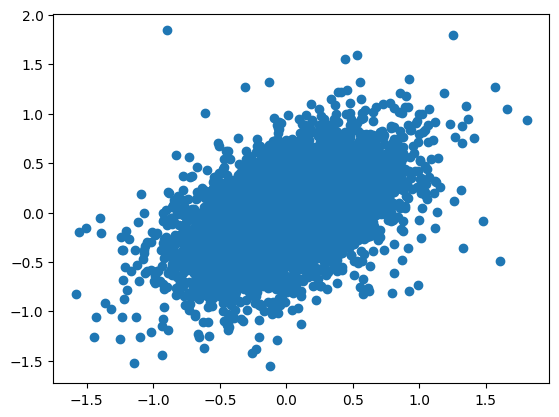

In [7]:
plt.scatter(fit2.y_sim[:, 0], fit2.y_sim[:, 1])

Centered at (0,0)

3.

Simulate parameters from the posterior using `stan`. Describe how to treat diagnostics, and then interpret and display your results. Take note of any interesting findings regarding parameter estimates. 

Try to use [`hist2d()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist2d.html) to visualize the posteriof of $\mu$.
For visualizing the covariance matrix samples, just plot the three unique values on overlaid histograms.
                                                   

In [8]:
model_code3 = stan_file = os.path.join('.', 'hw63.stan')
model3 = CmdStanModel(stan_file=model_code3)

In [9]:
returns_data3 = {'n' : rets.shape[0], 
                'd' : rets.shape[1],
                'y': rets.values.transpose(),
                'diag_cov' : [1/2,1/3]}
fit3 = model3.sample(returns_data3)

01:31:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:31:58 - cmdstanpy - INFO - CmdStan done processing.
01:31:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = -nan, but random variable[2,1] = -nan (in 'hw63.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = -nan, but random variable[2,1] = -nan (in 'hw63.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = -nan, but random variable[2,1] = -nan (in 'hw63.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = -nan, but random variable[2,1] = -nan (in 'hw63.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is -nan. (in 'hw63.stan', line 14, column 2 to column 49)
	Exception: 

In [10]:
fit3.summary()['R_hat']

lp__          1.00355
mu[1]         1.00038
mu[2]         1.00059
Sigma[1,1]    1.00279
Sigma[1,2]    1.00303
Sigma[2,1]    1.00303
Sigma[2,2]    1.00322
Name: R_hat, dtype: float64

<Axes: >

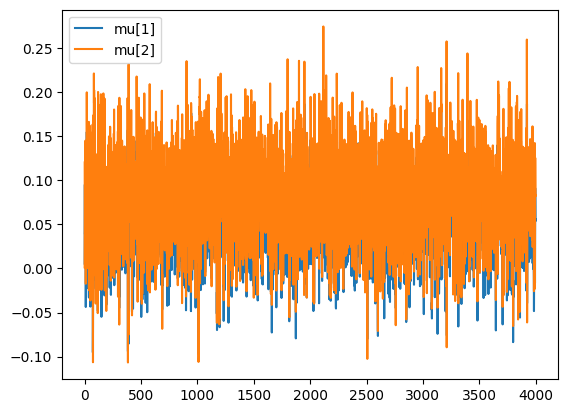

In [11]:
fit3.draws_pd()[['mu[1]','mu[2]']].plot()

(array([[ 11.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,  42.,  28.,   3.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  20., 155., 115.,   6.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,  69., 401., 187.,   4.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   3., 158., 643., 228.,   4.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   1., 247., 569., 159.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   8., 195., 366.,  53.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   6.,  89., 144.,  16.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,  26.,  19.,   3.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   2.]]),
 array([-0.0972171 , -0.06655589, -0.03589468, -0.00523347,  0.02542774,
         0.05608895,  0.08675016,  0.11741137,  0.14807258,  0.17873379,
         0.209395  ]),
 array([-0.106606 , -0.0685229, -0.0304398,  0.0076433,  0.0457264,
         0.0838095,  0.1218926,  0.1599757,  0.1980588,  0.23

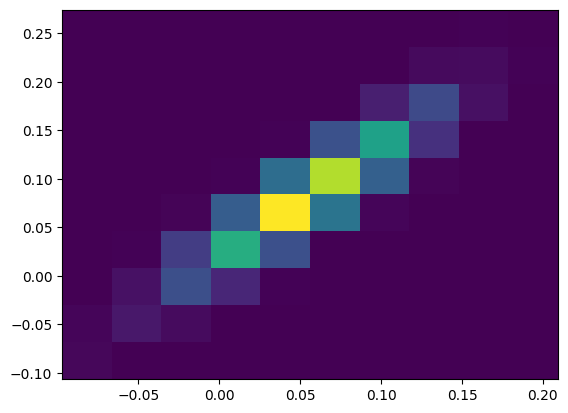

In [12]:
plt.hist2d(fit3.draws_pd()['mu[1]'], fit3.draws_pd()['mu[2]'])

<Axes: >

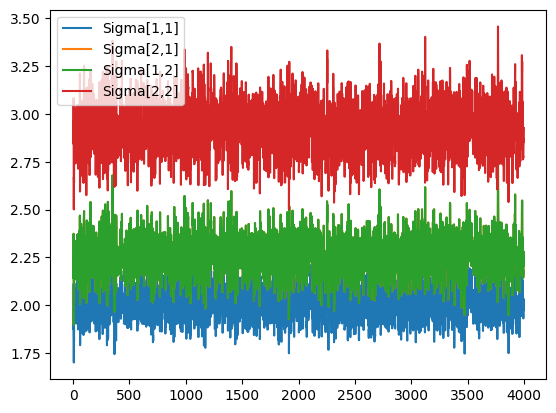

In [13]:
fit3.draws_pd()[['Sigma[1,1]','Sigma[2,1]', 'Sigma[1,2]', 'Sigma[2,2]']].plot()

<Axes: >

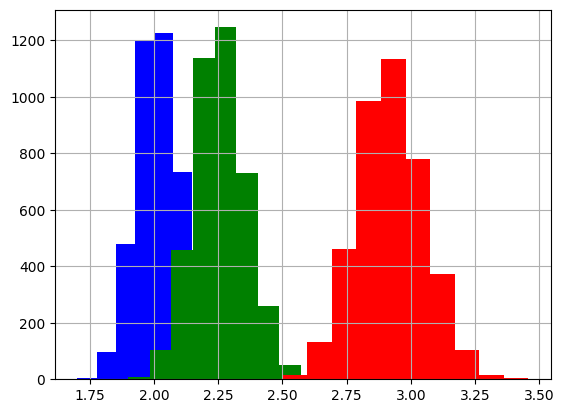

In [14]:
fit3.draws_pd()['Sigma[1,1]'].hist(color='blue')
fit3.draws_pd()['Sigma[1,2]'].hist(color='green')
fit3.draws_pd()['Sigma[2,2]'].hist(color='red')

4.

Take your chosen portfolio weights from homework 4 and simulate portfolio returns from the posterior predictive distribution. Are they "good?" Visualize them in a variety of interesting ways!

How do these returns compare with "backtested" returns? In other words, how do these simulated returns compare with taking the same weight vector, and seeing how they did retrospectively on "real" (not simulated) data. 

Keep in mind that retrospective analysis is not always indicative of future results!

In [15]:
model_code5 = os.path.join('.', 'hw65.stan')
model5 = CmdStanModel(stan_file=model_code5)

In [16]:
returns_data5 = {'n' : rets.shape[0], 
                'd' : rets.shape[1],
                'y': rets.values.transpose(),
                'diag_cov' : [1/2,1/3]}
fit5 = model5.sample(returns_data5)

01:32:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:32:34 - cmdstanpy - INFO - CmdStan done processing.
01:32:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = inf, but random variable[2,1] = inf (in 'hw65.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = inf, but random variable[2,1] = inf (in 'hw65.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = inf, but random variable[2,1] = inf (in 'hw65.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = inf, but random variable[2,1] = inf (in 'hw65.stan', line 14, column 2 to column 49)
	Exception: inv_wishart_lpdf: random variable is not symmetric. random variable[1,2] = inf, but random variable[2,1] = inf (in 'hw65.stan', line 14, column 2 to column 49)
	Exception: inv_wish

In [17]:
fit5.summary()['R_hat']

lp__          1.000010
mu[1]         1.000610
mu[2]         1.000530
Sigma[1,1]    1.000130
Sigma[1,2]    1.000000
Sigma[2,1]    1.000000
Sigma[2,2]    0.999834
y_tilde[1]    1.000090
y_tilde[2]    0.999863
Name: R_hat, dtype: float64

In [18]:
fit5.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu[1],mu[2],"Sigma[1,1]","Sigma[2,1]","Sigma[1,2]","Sigma[2,2]",y_tilde[1],y_tilde[2]
0,1.0,1.0,1.0,-894.748,0.808802,0.248425,3.0,7.0,0.0,900.399,0.025692,0.012008,2.07368,2.32978,2.32978,3.01595,0.917490,1.529210
1,1.0,2.0,2.0,-894.326,0.938312,0.248425,4.0,15.0,0.0,897.596,0.057412,0.084724,2.17716,2.43351,2.43351,3.10038,0.438546,0.581381
2,1.0,3.0,3.0,-894.764,0.972824,0.248425,4.0,15.0,0.0,896.124,0.120412,0.149101,2.12885,2.40475,2.40475,3.10088,-1.804400,-2.771410
3,1.0,4.0,4.0,-894.994,0.825819,0.248425,4.0,15.0,0.0,898.727,-0.030491,0.001403,2.09125,2.33870,2.33870,3.01320,0.925627,1.060810
4,1.0,5.0,5.0,-893.347,0.991629,0.248425,4.0,15.0,0.0,896.643,0.039387,0.047146,2.04045,2.27960,2.27960,2.95372,-0.077980,0.650738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,-894.035,0.974834,0.242629,4.0,15.0,0.0,895.442,0.016435,0.064215,2.06798,2.32896,2.32896,3.01449,0.897539,1.357070
3996,4.0,997.0,3997.0,-893.070,0.961600,0.242629,1.0,3.0,0.0,894.692,0.027379,0.050865,2.08791,2.33041,2.33041,2.99292,-2.310350,-2.164740
3997,4.0,998.0,3998.0,-893.258,0.907663,0.242629,4.0,31.0,0.0,894.654,0.077118,0.098727,1.93114,2.14820,2.14820,2.78614,-1.233030,-1.184680
3998,4.0,999.0,3999.0,-893.156,0.814277,0.242629,3.0,11.0,0.0,895.195,0.075069,0.088373,1.98343,2.21824,2.21824,2.88401,-1.718150,-1.883420


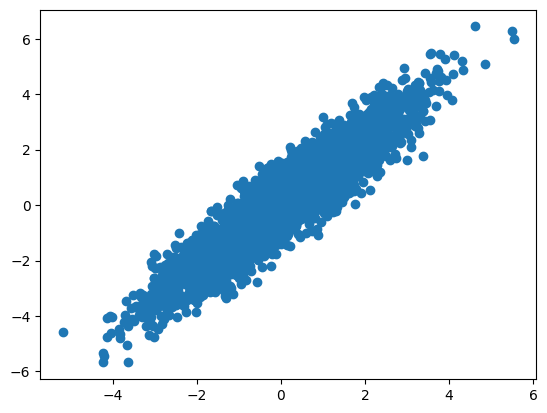

In [19]:
plt.scatter(fit5.draws_pd()['y_tilde[1]'], fit5.draws_pd()['y_tilde[2]'])

In [17]:
weights = np.array([-10.92431018,  11.92431018])
futures = [fit5.draws_pd()['y_tilde[1]'], fit5.draws_pd()['y_tilde[2]']]

In [18]:
portfolio = np.dot(weights, futures)
portfolio

array([ -1.84059926,  -2.47410694,  -1.53812711, ...,  -3.63705517,
         4.64105873, -11.75645205])

(array([   5.,   42.,  215.,  581., 1000., 1050.,  755.,  288.,   55.,
           9.]),
 array([-30.21731226, -24.27663414, -18.33595602, -12.39527789,
         -6.45459977,  -0.51392165,   5.42675647,  11.36743459,
         17.30811271,  23.24879083,  29.18946895]),
 <BarContainer object of 10 artists>)

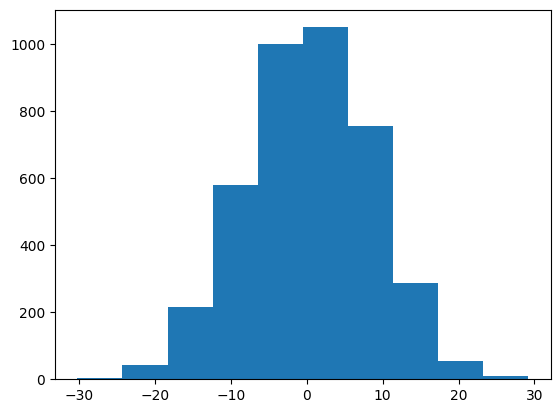

In [19]:
plt.hist(portfolio)

In [20]:
portfolio.mean()

0.27668146455781006

<Axes: >

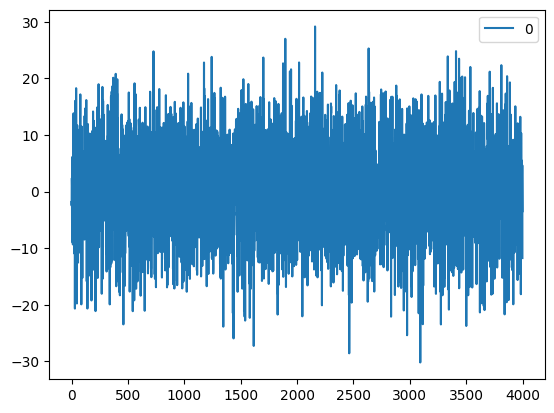

In [21]:
port = pd.DataFrame(portfolio)
port.plot()

5.

Simulate parameters from the posterior after making adjustments to your prior. Do not feel obligated to re-do all of the same work you did in the previous problem. Instead, discuss (qualitatively) how sensitive your posterior appears to be to the choices you made on your prior. 

It's fairly sensitive I guess. I messed around with different weights generated by different gammas from homework 4. The mean of the portfolio scales up slow at first but then quickly the more risky you. This lends itself to my conclusion from homework 4 that if you can wait out this highs and lows the risky strategy works in the long run (as long as you sell on top). My weights look like they actually decrease the overall return?

6.

Now choose any prior you want for the unknown mean and covariance matrix parameters. You can do anything you want as long as you

 - produce `stan` code that runs without error, and
 - use the LKJ distribution for the correlation matrix. 

Be sure to complete all the above steps:

 - simulate from the prior predictive distribution as a check on the prior;
 - simulate parameters from the posterior (check diagnostics, visualize and report); and
 - simulate from the posterior predictive distribution in the same way you did earlier.

In [22]:
model_code61 = stan_file = os.path.join('.', 'hw661t2.stan')
model61 = CmdStanModel(stan_file=model_code61)

In [24]:
returns_data61 = {'N' : rets.shape[0], 
                'K' : rets.shape[1],
                'eta': 1}
fit61 = model61.sample(returns_data61, fixed_param = True)

01:33:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:33:42 - cmdstanpy - INFO - CmdStan done processing.


In [25]:
fit61.summary()['R_hat']

mu[1]            2.526718e+14
mu[2]            3.262734e+14
L_std[1]         7.888851e+13
L_std[2]         9.732550e+13
L_Omega[1,1]              NaN
                     ...     
y_sim[2,1001]    3.335140e+00
y_sim[2,1002]    3.294500e+00
y_sim[2,1003]    3.321730e+00
y_sim[2,1004]    3.274940e+00
y_sim[2,1005]    3.269410e+00
Name: R_hat, Length: 2022, dtype: float64

In [26]:
fit61.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,mu[1],mu[2],L_std[1],L_std[2],"L_Omega[1,1]",...,"y_sim[1,1001]","y_sim[2,1001]","y_sim[1,1002]","y_sim[2,1002]","y_sim[1,1003]","y_sim[2,1003]","y_sim[1,1004]","y_sim[2,1004]","y_sim[1,1005]","y_sim[2,1005]"
0,1.0,1.0,1.0,0.0,0.0,1.454440,0.574536,6.08857,0.565636,1.0,...,6.726090,0.962890,-2.892150,-0.002229,2.50179,0.987014,19.448600,1.771950,4.33129,0.774155
1,1.0,2.0,2.0,0.0,0.0,1.454440,0.574536,6.08857,0.565636,1.0,...,-5.309010,-0.165095,-5.353110,0.376954,-1.66945,0.520031,8.459780,0.905414,6.64450,1.183780
2,1.0,3.0,3.0,0.0,0.0,1.454440,0.574536,6.08857,0.565636,1.0,...,13.305600,1.409220,-6.240120,-0.560067,-2.69114,0.462508,-7.067710,-0.619673,2.88614,0.626498
3,1.0,4.0,4.0,0.0,0.0,1.454440,0.574536,6.08857,0.565636,1.0,...,2.833700,0.870769,5.316560,1.020770,9.51698,1.102790,-5.741920,-0.034419,-7.20247,-0.274211
4,1.0,5.0,5.0,0.0,0.0,1.454440,0.574536,6.08857,0.565636,1.0,...,11.249900,1.451230,9.056660,0.916689,9.33305,1.124130,8.408960,0.855866,-2.35771,0.241004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,0.0,0.0,0.987953,1.727740,2.00658,0.230647,1.0,...,3.620830,1.739710,4.786200,1.735520,1.59356,2.092550,3.888810,1.531430,3.83727,1.682560
3996,4.0,997.0,3997.0,0.0,0.0,0.987953,1.727740,2.00658,0.230647,1.0,...,0.576142,1.768590,6.471840,1.496310,2.54589,1.813080,1.193990,1.819040,-2.72947,1.796460
3997,4.0,998.0,3998.0,0.0,0.0,0.987953,1.727740,2.00658,0.230647,1.0,...,2.145370,1.771140,0.206175,1.670420,1.05189,1.703770,1.998990,1.515050,4.65216,1.303390
3998,4.0,999.0,3999.0,0.0,0.0,0.987953,1.727740,2.00658,0.230647,1.0,...,-0.269380,1.668800,4.222090,1.596070,-1.78364,1.851880,-0.407646,1.699070,1.52551,1.510070


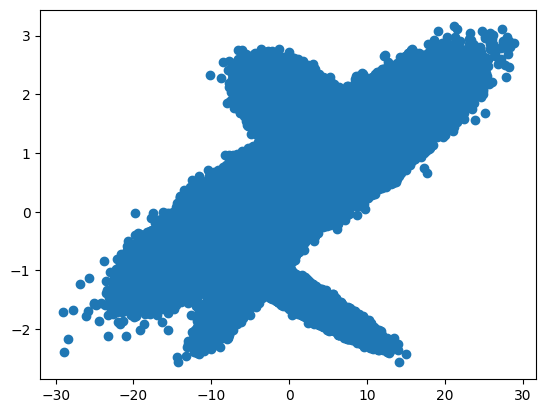

In [27]:
plt.scatter(fit61.y_sim[:, 0], fit61.y_sim[:, 1])

In [28]:
model_code62 = stan_file = os.path.join('.', 'hw662.stan')
model62 = CmdStanModel(stan_file=model_code62)

In [29]:
returns_data62 = {'N' : rets.shape[0], 
                'K' : rets.shape[1],
                'y': rets.values.transpose(),
                'eta': 1}
fit62 = model62.sample(returns_data62)

01:34:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:34:51 - cmdstanpy - INFO - CmdStan done processing.
01:34:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw662.stan', line 26, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive!

In [30]:
fit62.summary()['R_hat']

lp__            0.999712
mu[1]           0.999501
mu[2]           0.999584
L_std[1]        0.999888
L_std[2]        1.000130
L_Omega[1,1]         NaN
L_Omega[1,2]         NaN
L_Omega[2,1]    0.999963
L_Omega[2,2]    0.999995
L_Sigma[1,1]    0.999888
L_Sigma[1,2]         NaN
L_Sigma[2,1]    1.000150
L_Sigma[2,2]    0.999806
Name: R_hat, dtype: float64

<Axes: >

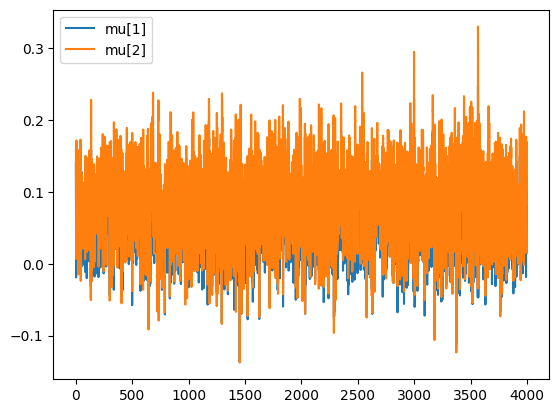

In [31]:
fit62.draws_pd()[['mu[1]','mu[2]']].plot()

<Axes: >

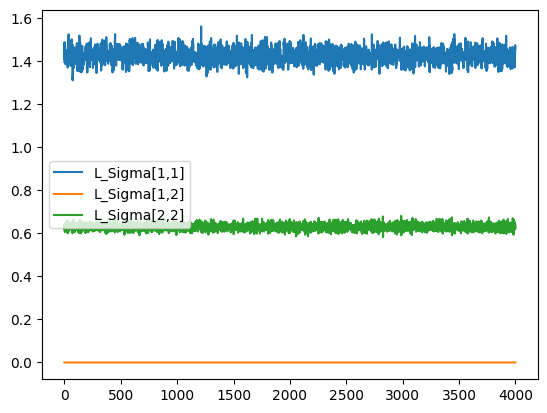

In [32]:
fit62.draws_pd()[['L_Sigma[1,1]', 'L_Sigma[1,2]', 'L_Sigma[2,2]']].plot()

<Axes: >

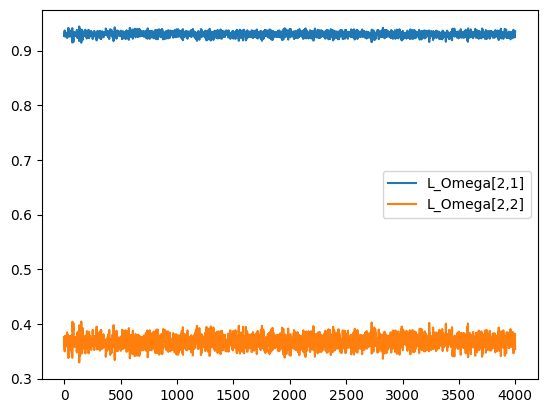

In [33]:
fit62.draws_pd()[['L_Omega[2,1]', 'L_Omega[2,2]']].plot()

In [36]:
model_code63 = stan_file = os.path.join('.', 'hw663.stan')
model63 = CmdStanModel(stan_file=model_code63)

23:55:23 - cmdstanpy - INFO - compiling stan file /bml24/hw663.stan to exe file /bml24/hw663
23:55:48 - cmdstanpy - INFO - compiled model executable: /bml24/hw663


In [37]:
returns_data63 = {'N' : rets.shape[0], 
                'K' : rets.shape[1],
                'y': rets.values.transpose(),
                'eta': 1}
fit63 = model63.sample(returns_data63)

23:55:48 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:56:02 - cmdstanpy - INFO - CmdStan done processing.
23:56:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive! (in 'hw663.stan', line 23, column 2 to column 35)
	Exception: lkj_corr_cholesky_lpdf: Random variable[2] is 0, but must be positive!

In [38]:
fit63.summary()['R_hat']

lp__            1.001190
mu[1]           1.001890
mu[2]           1.001950
L_std[1]        1.000570
L_std[2]        1.000730
L_Omega[1,1]         NaN
L_Omega[1,2]         NaN
L_Omega[2,1]    0.999745
L_Omega[2,2]    0.999741
L_Sigma[1,1]    1.000570
L_Sigma[1,2]         NaN
L_Sigma[2,1]    1.000680
L_Sigma[2,2]    0.999261
y_tilde[1]      1.000130
y_tilde[2]      0.999985
Name: R_hat, dtype: float64

In [39]:
fit63.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,"L_Omega[1,1]","L_Omega[2,1]","L_Omega[1,2]","L_Omega[2,2]","L_Sigma[1,1]","L_Sigma[2,1]","L_Sigma[1,2]","L_Sigma[2,2]",y_tilde[1],y_tilde[2]
0,1.0,1.0,1.0,-899.764,0.766211,0.261336,4.0,15.0,0.0,903.267,...,1.0,0.929476,0.0,0.368884,1.45400,1.62899,0.0,0.646502,0.561160,0.507383
1,1.0,2.0,2.0,-897.707,0.998009,0.261336,3.0,11.0,0.0,900.693,...,1.0,0.935447,0.0,0.353468,1.43398,1.60482,0.0,0.606397,0.062348,1.185000
2,1.0,3.0,3.0,-897.000,0.948802,0.261336,4.0,31.0,0.0,901.164,...,1.0,0.923825,0.0,0.382814,1.38283,1.54443,0.0,0.639981,0.791895,-0.200458
3,1.0,4.0,4.0,-897.324,0.965553,0.261336,3.0,15.0,0.0,901.713,...,1.0,0.930219,0.0,0.367006,1.45555,1.62670,0.0,0.641792,0.295334,1.781660
4,1.0,5.0,5.0,-896.842,0.986295,0.261336,3.0,15.0,0.0,898.308,...,1.0,0.933805,0.0,0.357782,1.41580,1.59632,0.0,0.611623,-1.004860,-0.968335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,-901.440,0.980032,0.246968,3.0,7.0,0.0,903.441,...,1.0,0.935008,0.0,0.354626,1.52112,1.66781,0.0,0.632559,-3.495060,-3.692650
3996,4.0,997.0,3997.0,-901.124,0.982030,0.246968,3.0,7.0,0.0,904.198,...,1.0,0.932148,0.0,0.362078,1.50939,1.69413,0.0,0.658057,0.272746,0.829112
3997,4.0,998.0,3998.0,-895.927,0.951624,0.246968,3.0,15.0,0.0,904.432,...,1.0,0.931749,0.0,0.363103,1.42875,1.59964,0.0,0.623378,2.486870,3.851900
3998,4.0,999.0,3999.0,-896.461,0.989800,0.246968,4.0,31.0,0.0,896.724,...,1.0,0.932565,0.0,0.361002,1.45255,1.62920,0.0,0.630673,-0.508463,-0.416237


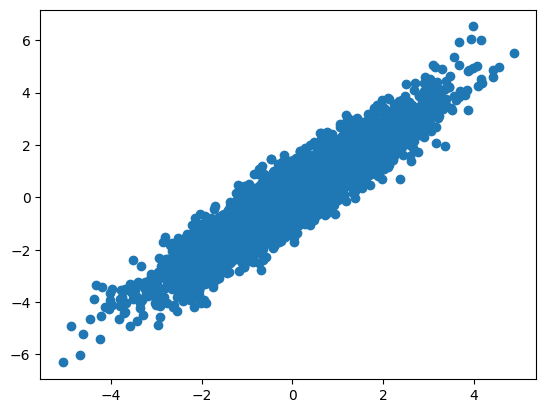

In [40]:
plt.scatter(fit63.draws_pd()['y_tilde[1]'], fit63.draws_pd()['y_tilde[2]'])